In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
train = pd.read_csv('log_transformed.csv')
test = pd.read_csv('log_test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,0.693147,4.110874,1.386294,4.189655,9.042040,0.693147,1.098612,0.000000,0.693147,0.693147,...,1.386294,0.0,1.098612,7.605392,1.609438,1.609438,12.247699,0.0,0.0,0.0
1,1.098612,3.044522,1.386294,4.394449,9.169623,0.693147,1.098612,0.000000,0.693147,0.693147,...,1.386294,0.0,1.791759,7.604894,1.609438,1.609438,12.109016,0.0,0.0,0.0
2,1.386294,4.110874,1.386294,4.234107,9.328212,0.693147,1.098612,0.693147,0.693147,0.693147,...,1.386294,0.0,2.302585,7.605392,1.609438,1.609438,12.317171,0.0,0.0,0.0
3,1.609438,4.262680,1.386294,4.110874,9.164401,0.693147,1.098612,0.693147,0.693147,0.693147,...,1.386294,0.0,1.098612,7.604396,1.609438,0.693147,11.849405,0.0,0.0,0.0
4,1.791759,4.110874,1.386294,4.442651,9.565284,0.693147,1.098612,0.693147,0.693147,0.693147,...,1.386294,0.0,2.564949,7.605392,1.609438,1.609438,12.429220,0.0,0.0,0.0


In [4]:
y = train['SalePrice'].copy()
x = train.drop('SalePrice', axis = 1)

In [5]:
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,0.693147,4.110874,1.386294,4.189655,9.042040,0.693147,1.098612,0.000000,0.693147,0.693147,...,1.609438,1.386294,0.0,1.098612,7.605392,1.609438,1.609438,0.0,0.0,0.0
1,1.098612,3.044522,1.386294,4.394449,9.169623,0.693147,1.098612,0.000000,0.693147,0.693147,...,1.609438,1.386294,0.0,1.791759,7.604894,1.609438,1.609438,0.0,0.0,0.0
2,1.386294,4.110874,1.386294,4.234107,9.328212,0.693147,1.098612,0.693147,0.693147,0.693147,...,1.609438,1.386294,0.0,2.302585,7.605392,1.609438,1.609438,0.0,0.0,0.0
3,1.609438,4.262680,1.386294,4.110874,9.164401,0.693147,1.098612,0.693147,0.693147,0.693147,...,1.609438,1.386294,0.0,1.098612,7.604396,1.609438,0.693147,0.0,0.0,0.0
4,1.791759,4.110874,1.386294,4.442651,9.565284,0.693147,1.098612,0.693147,0.693147,0.693147,...,1.609438,1.386294,0.0,2.564949,7.605392,1.609438,1.609438,0.0,0.0,0.0


In [6]:
x = x.drop('Id', axis = 1)

In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,7.287561,3.044522,1.098612,4.394449,9.360741,0.693147,1.098612,0.000000,0.693147,0.693147,...,1.098612,1.386294,0.000000,1.945910,7.606387,1.609438,1.609438,0.0,0.0,0.0
1,7.288244,3.044522,1.386294,4.406719,9.565775,0.693147,1.098612,0.693147,0.693147,0.693147,...,1.609438,1.098612,9.433564,1.945910,7.606387,1.609438,1.609438,0.0,0.0,0.0
2,7.288928,4.110874,1.386294,4.317488,9.534668,0.693147,1.098612,0.693147,0.693147,0.693147,...,1.098612,1.386294,0.000000,1.386294,7.606387,1.609438,1.609438,0.0,0.0,0.0
3,7.289611,4.110874,1.386294,4.369448,9.208238,0.693147,1.098612,0.693147,0.693147,0.693147,...,1.609438,1.386294,0.000000,1.945910,7.606387,1.609438,1.609438,0.0,0.0,0.0
4,7.290293,4.795791,1.386294,3.784190,8.518392,0.693147,1.098612,0.693147,1.386294,0.693147,...,1.609438,1.386294,0.000000,0.693147,7.606387,1.609438,1.609438,0.0,0.0,0.0


In [8]:
test.drop('Id', axis = 1, inplace = True)

In [9]:
linearregression = LinearRegression()

In [10]:
linearregression.fit(x,y)

LinearRegression()

In [11]:
linearregression.score(x,y)

0.9062157462070137

In [12]:
sgd = SGDRegressor(eta0=0.004)

In [13]:
sgd.fit(x,y)

SGDRegressor(eta0=0.004)

In [14]:
sgd.score(x,y)

0.8492978632487087

In [15]:
svr = SVR(kernel='poly', degree=4)

In [16]:
svr.fit(x,y)

SVR(degree=4, kernel='poly')

In [17]:
svr.score(x,y)

0.9267769792238132

In [18]:
x.shape

(1460, 82)

In [19]:
reg_score = linearregression.predict(test)

In [20]:
reg_score

array([11.66810662, 11.97161446, 12.09116565, ..., 12.0346795 ,
       11.75761748, 12.36675554])

In [21]:
# Inverse of numpy
import numpy as np
reg_score = np.e**reg_score - 1

In [22]:
reg_score

array([116785.95047615, 158198.86138574, 178288.80926354, ...,
       168497.05682805, 127721.78833794, 234861.50559184])

In [23]:
svr_score = svr.predict(test)

In [24]:
svr_score

array([11.68843115, 12.07818993, 12.11661595, ..., 12.02470375,
       11.60904606, 12.33426453])

In [25]:
svr_score = np.e**svr_score - 1

In [26]:
svr_score

array([119183.87630894, 175990.31585782, 182884.57176662, ...,
       166824.51864118, 110088.18173211, 227353.22167149])

In [27]:
print(np.e**11.76364441 - 1)

128493.88923034928


In [160]:
submission = pd.read_csv('sample_submission.csv')

In [29]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [30]:
submission_reg = submission.copy()

In [31]:
submission_reg.SalePrice = reg_score

In [32]:
submission_reg.head()

,Id,SalePrice
0,1461,116785.950476
1,1462,158198.861386
2,1463,178288.809264
3,1464,198011.398659
4,1465,197499.427460


In [33]:
submission_svr = submission.copy()

In [34]:
submission_svr.SalePrice = svr_score

In [130]:
#submission_reg.to_csv('Regression.csv', index = False)
submission_svr.to_csv('SVR.csv', index = False)

In [28]:
tree = DecisionTreeRegressor()

In [29]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,4.110874,1.386294,4.189655,9.042040,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.609438,1.386294,0.0,1.098612,7.605392,1.609438,1.609438,0.0,0.0,0.0
1,3.044522,1.386294,4.394449,9.169623,0.693147,1.098612,0.000000,0.693147,0.693147,0.693147,...,1.609438,1.386294,0.0,1.791759,7.604894,1.609438,1.609438,0.0,0.0,0.0
2,4.110874,1.386294,4.234107,9.328212,0.693147,1.098612,0.693147,0.693147,0.693147,0.000000,...,1.609438,1.386294,0.0,2.302585,7.605392,1.609438,1.609438,0.0,0.0,0.0
3,4.262680,1.386294,4.110874,9.164401,0.693147,1.098612,0.693147,0.693147,0.693147,1.098612,...,1.609438,1.386294,0.0,1.098612,7.604396,1.609438,0.693147,0.0,0.0,0.0
4,4.110874,1.386294,4.442651,9.565284,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,...,1.609438,1.386294,0.0,2.564949,7.605392,1.609438,1.609438,0.0,0.0,0.0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [32]:
tree = DecisionTreeRegressor(max_depth=4)

In [33]:
tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [34]:
tree.score(x_train, y_train)

0.7903547930314009

In [35]:
tree.score(x_test, y_test)

0.7706310136669002

In [36]:
from xgboost import XGBRegressor

In [37]:
xg = XGBRegressor(max_depth=2, learning_rate=0.330000012)

In [38]:
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.330000012,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [39]:
xg.score(x_train, y_train)

0.9600817418328546

In [40]:
xg.score(x_test, y_test)

0.9071835310417843

In [95]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [96]:
rn = RadiusNeighborsRegressor()

In [97]:
rn.fit(x_train, y_train)

RadiusNeighborsRegressor()

In [98]:
rn.score(x_train, y_train)

0.999306771235256

In [99]:
x_train.shape

(1168, 82)

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
forest = RandomForestRegressor(n_estimators=65, max_depth=8)

In [102]:
forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=65)

In [103]:
forest.score(x_train, y_train)

0.963540896769724

In [104]:
forest.score(x_test, y_test)

0.880814036270371

In [105]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [106]:
passive = PassiveAggressiveRegressor()

In [107]:
passive.fit(x_train, y_train)

PassiveAggressiveRegressor()

In [108]:
passive.score(x_train, y_train)

0.8464030461123411

In [109]:
passive.score(x_test, y_test)

0.8465723063608847

In [110]:
from sklearn.linear_model import ARDRegression

In [111]:
ard = ARDRegression()

In [112]:
ard.fit(x_train, y_train)

ARDRegression()

In [113]:
ard.score(x_train, y_train)

0.8986377064392037

In [114]:
ard.score(x_test, y_test)

0.8944849820074079

In [115]:
from sklearn.svm import SVR

In [116]:
svr = SVR(kernel='poly', degree=4)

In [117]:
svr.fit(x_train, y_train)

SVR(degree=4, kernel='poly')

In [118]:
svr.score(x_train, y_train)

0.93192299575323

In [119]:
svr.score(x_test, y_test)

0.893812988190747

In [195]:
ard_score = ard.predict(test)

In [121]:
import numpy as np

In [197]:
ard_score = np.e**ard_score - 1

In [124]:
ard_submission = pd.read_csv('sample_submission.csv')

In [199]:
ard_submission.SalePrice = ard_score

In [200]:
ard_submission.head()

,Id,SalePrice
0,1461,110204.155276
1,1462,154478.622389
2,1463,174182.940901
3,1464,192172.630468
4,1465,195739.909933


In [201]:
ard_submission.to_csv('ard_submission.csv', index=False)

In [312]:
forest_score = forest.predict(test)
forest_score = np.e**forest_score - 1

In [313]:
forest_submission = ard_submission.copy()
forest_submission.SalePrice = forest_score.copy()
forest_submission.to_csv('forest_submission.csv', index = False)

In [120]:
xg_score = xg.predict(test)

In [122]:
xg_score = np.e**xg_score - 1

In [125]:
ard_submission.SalePrice = xg_score

In [126]:
ard_submission

,Id,SalePrice
0,1461,133744.296875
1,1462,155819.750000
2,1463,186155.812500
3,1464,188598.937500
4,1465,195384.218750
...,...,...
1454,2915,80708.093750
1455,2916,81587.695312
1456,2917,150500.843750
1457,2918,118347.671875


In [127]:
exp = pd.read_csv('SVR.csv')
exp

,Id,SalePrice
0,1461,119183.876309
1,1462,175990.315858
2,1463,182884.571767
3,1464,197267.423387
4,1465,195848.968009
...,...,...
1454,2915,93118.460887
1455,2916,85237.859101
1456,2917,166824.518641
1457,2918,110088.181732


In [128]:
import matplotlib.pyplot as plt

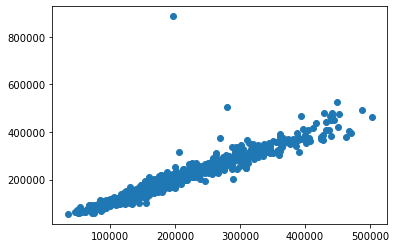

In [129]:
plt.scatter(ard_submission.SalePrice, exp.SalePrice)

In [143]:
from sklearn.ensemble import VotingRegressor

In [145]:
estimator = [('lr', linearregression),('SVR',svr),('XGB', xg)]

In [146]:
voting = VotingRegressor(estimators=estimator)

In [147]:
voting.fit(x_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('SVR', SVR(degree=4, kernel='poly')),
                            ('XGB',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.330000012,
                                          max_delta_step=0, max_depth=2,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,


In [148]:
voting.score(x_train, y_train)

0.9453746718214132

In [149]:
voting.score(x_test, y_test)

0.9115338678954271

In [156]:
voting_score = voting.predict(test)

In [157]:
voting_score = np.e**voting_score -1

In [161]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [162]:
submission.SalePrice = voting_score
submission.head()

,Id,SalePrice
0,1461,123754.394623
1,1462,159352.040560
2,1463,181603.606754
3,1464,192486.222746
4,1465,199343.929234


In [163]:
submission.to_csv('voting.csv', index = False)

#### Voting Has given the Best score on Kaggle current ranking 705